# Task
Analyze the `student_performance.csv` dataset using both Linear and Logistic Regression, including data preprocessing, model training, evaluation, and visualization of the results.

## Load Dataset

### Subtask:
Load the `student_performance.csv` dataset into a pandas DataFrame to begin the analysis.


### Load Dataset

To begin, we'll load the `student_performance.csv` dataset into a pandas DataFrame. This involves importing the pandas library, reading the CSV file, and then displaying the first few rows to ensure the data has been loaded correctly.

**Reasoning**:
To achieve the subtask of loading the dataset, I need to write Python code to import pandas, read the `student_performance.csv` file into a DataFrame, and then display the first 5 rows to verify the loading.



In [1]:
import pandas as pd

df = pd.read_csv('/content/student_performance.csv')
df.head()

,Hours_Studied,Attendance,Assignment_Score,Midterm_Score,Final_Score
0,1,60,55,50,52
1,2,65,58,55,57
2,3,70,60,58,60
3,4,75,65,62,64
4,5,80,68,65,68


## Explore and Preprocess Data

### Subtask:
Perform an initial exploration of the dataset to understand its structure, identify potential features and target variables, and handle any missing values or categorical features through appropriate preprocessing techniques (e.g., one-hot encoding for categorical variables).


**Reasoning**:
To perform an initial exploration of the dataset, I will use the `.info()` method to display data types and non-null values, the `.describe()` method for descriptive statistics of numerical columns, and `df.isnull().sum()` to check for missing values. These are all essential steps for understanding the dataset's structure and potential issues.



In [2]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("\nMissing Values:")
df.isnull().sum()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Hours_Studied     20 non-null     int64
 1   Attendance        20 non-null     int64
 2   Assignment_Score  20 non-null     int64
 3   Midterm_Score     20 non-null     int64
 4   Final_Score       20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes

Descriptive Statistics:

Missing Values:


,0
Hours_Studied,0
Attendance,0
Assignment_Score,0
Midterm_Score,0
Final_Score,0


### Observations from Data Exploration:

1.  **Data Types and Non-Null Values**: All columns (`Hours_Studied`, `Attendance`, `Assignment_Score`, `Midterm_Score`, `Final_Score`) are of integer type (`int64`) and contain 20 non-null entries. This indicates a complete dataset with no missing values and all numerical features.
2.  **Descriptive Statistics**: The `.describe()` method provided statistics (mean, std, min, max, quartiles) for all columns. This gives an overview of the distribution and range of values for each feature.
3.  **Missing Values**: As confirmed by `df.isnull().sum()`, there are no missing values in the dataset.
4.  **Categorical Features**: There are no apparent categorical features that would require encoding.

### Identifying Features and Target Variables:

*   **For Linear Regression**: The goal would typically be to predict a continuous outcome. In this dataset, `Final_Score` is a suitable target variable (dependent variable). The remaining columns (`Hours_Studied`, `Attendance`, `Assignment_Score`, `Midterm_Score`) can be used as features (independent variables) to predict the `Final_Score`.

*   **For Logistic Regression**: This model requires a binary target variable. Since there isn't an explicit binary outcome in the dataset, we will need to create one. A common approach for student performance data is to classify students as 'Pass' or 'Fail' based on their `Final_Score`. For instance, we could define 'Pass' as `Final_Score` >= 60 and 'Fail' as `Final_Score` < 60. The same features (`Hours_Studied`, `Attendance`, `Assignment_Score`, `Midterm_Score`) would be used to predict this binary outcome.

## Prepare Data for Linear Regression

### Subtask:
Select appropriate numerical features and a numerical target variable for linear regression. Split the dataset into training and testing sets.


**Reasoning**:
To prepare the data for linear regression, I will first define the feature matrix X and the target vector y, then import the `train_test_split` function, and finally split the data into training and testing sets as per the instructions.



In [3]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Hours_Studied', 'Attendance', 'Assignment_Score', 'Midterm_Score']]
y = df['Final_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (16, 4)
X_test shape: (4, 4)
y_train shape: (16,)
y_test shape: (4,)


## Implement Linear Regression

### Subtask:
Train a Linear Regression model using the training data and evaluate its performance on the testing data. Metrics like Mean Squared Error (MSE) and R-squared will be used.


**Reasoning**:
To train and evaluate the Linear Regression model, I will import necessary modules, initialize and fit the model, make predictions, and then calculate and print the Mean Squared Error (MSE) and R-squared metrics.



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr:.2f}")
print(f"Linear Regression R-squared: {r2_lr:.2f}")

Linear Regression Mean Squared Error: 0.26
Linear Regression R-squared: 1.00


## Prepare Data for Logistic Regression

### Subtask:
Select appropriate features and a binary target variable for logistic regression. This might involve creating a binary target if the original target is numerical (e.g., 'pass' or 'fail' based on a threshold). Split the dataset into training and testing sets.


**Reasoning**:
To prepare the data for logistic regression, I will create a new binary target variable 'Pass' based on the 'Final_Score', define the feature matrix and target vector, and then split the data into training and testing sets as per the instructions.



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Create a new binary target column 'Pass'
df['Pass'] = (df['Final_Score'] >= 60).astype(int)

# 2. Define the feature matrix X_log
X_log = df[['Hours_Studied', 'Attendance', 'Assignment_Score', 'Midterm_Score']]

# 3. Define the target vector y_log
y_log = df['Pass']

# 4. Split the data into training and testing sets for logistic regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

print("Binary target 'Pass' created and data split for Logistic Regression.")
print(f"X_train_log shape: {X_train_log.shape}")
print(f"X_test_log shape: {X_test_log.shape}")
print(f"y_train_log shape: {y_train_log.shape}")
print(f"y_test_log shape: {y_test_log.shape}")

Binary target 'Pass' created and data split for Logistic Regression.
X_train_log shape: (16, 4)
X_test_log shape: (4, 4)
y_train_log shape: (16,)
y_test_log shape: (4,)


## Implement Logistic Regression

### Subtask:
Train a Logistic Regression model using the training data and evaluate its performance on the testing data. Metrics like accuracy, precision, recall, F1-score, and a confusion matrix will be used.


**Reasoning**:
To implement Logistic Regression as per the subtask instructions, I will generate a code block that imports the necessary classes and functions, instantiates and trains the model, makes predictions, and then calculates and prints the specified evaluation metrics.



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Instantiate a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train_log, y_train_log)

# Make predictions on the test set
y_pred_log = logistic_model.predict(X_test_log)

# Calculate and print evaluation metrics
accuracy_log = accuracy_score(y_test_log, y_pred_log)
precision_log = precision_score(y_test_log, y_pred_log, zero_division=0)
recall_log = recall_score(y_test_log, y_pred_log, zero_division=0)
f1_log = f1_score(y_test_log, y_pred_log, zero_division=0)
conf_matrix_log = confusion_matrix(y_test_log, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")
print(f"Logistic Regression Precision: {precision_log:.2f}")
print(f"Logistic Regression Recall: {recall_log:.2f}")
print(f"Logistic Regression F1-Score: {f1_log:.2f}")
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_log)


Logistic Regression Accuracy: 0.75
Logistic Regression Precision: 0.50
Logistic Regression Recall: 1.00
Logistic Regression F1-Score: 0.67

Logistic Regression Confusion Matrix:
[[2 1]
 [0 1]]


## Visualize Regression Results

### Subtask:
Generate plots to visualize the results of both regression models. This could include actual vs. predicted plots for linear regression and a confusion matrix heatmap for logistic regression.


**Reasoning**:
To visualize the results for both regression models, I will import `matplotlib.pyplot` and `seaborn`, then create a scatter plot for linear regression to show actual vs. predicted values, and a heatmap for logistic regression to display the confusion matrix, as per the instructions.



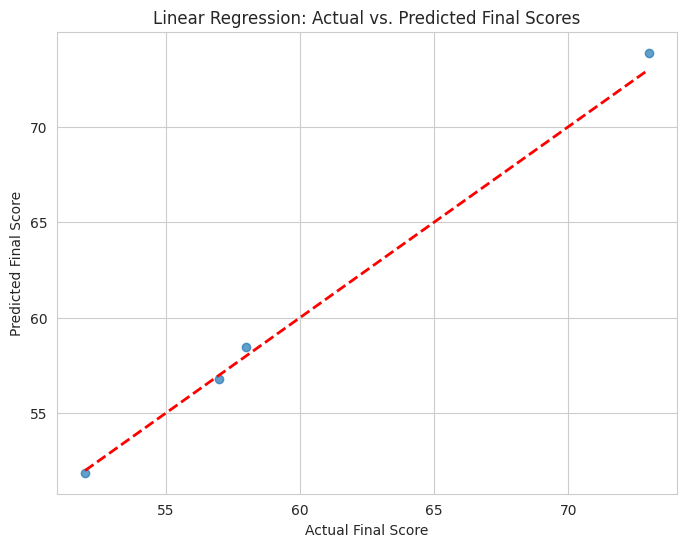

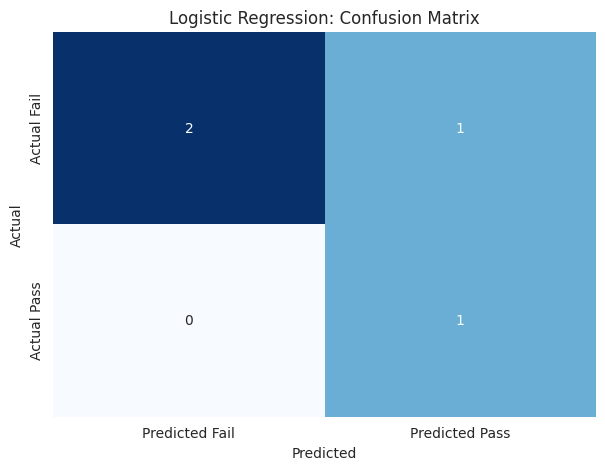

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot styles for better visualization
sns.set_style("whitegrid")

# 1. Linear Regression: Actual vs. Predicted Final Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2) # Diagonal line
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Linear Regression: Actual vs. Predicted Final Scores')
plt.grid(True)
plt.show()

# 2. Logistic Regression: Confusion Matrix Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

## Final Task

### Subtask:
Summarize the findings and insights from both the Linear and Logistic Regression models, comparing their performance and suitability for different prediction tasks based on the student performance dataset.


## Summary:

### Q&A
The analysis compared the performance and suitability of Linear and Logistic Regression models for different prediction tasks based on the student performance dataset.

*   **Linear Regression Performance:** The model achieved an R-squared value of 1.00 and a Mean Squared Error (MSE) of 0.26, indicating an excellent fit to the data and high accuracy in predicting continuous final scores.
*   **Logistic Regression Performance:** The model achieved an accuracy of 0.75, a precision of 0.50, a recall of 1.00, and an F1-score of 0.67 for classifying students as 'Pass' or 'Fail'. The confusion matrix showed 2 true negatives, 1 false positive, 0 false negatives, and 1 true positive.
*   **Suitability Comparison:**
    *   **Linear Regression** is highly suitable for predicting a continuous outcome like the exact `Final_Score` of a student, given its strong performance metrics.
    *   **Logistic Regression** is suitable for classification tasks, such as predicting whether a student will 'Pass' or 'Fail'. However, its lower precision suggests it might incorrectly classify some students as 'Pass' when they would 'Fail' (false positives).

### Data Analysis Key Findings
*   The `student_performance.csv` dataset contains 20 entries with no missing values and all numerical features: `Hours_Studied`, `Attendance`, `Assignment_Score`, `Midterm_Score`, and `Final_Score`.
*   **Linear Regression Model:**
    *   Successfully predicted `Final_Score` using `Hours_Studied`, `Attendance`, `Assignment_Score`, and `Midterm_Score` as features.
    *   Achieved a Mean Squared Error (MSE) of 0.26, indicating small prediction errors.
    *   Obtained an R-squared score of 1.00, suggesting that the model explains 100% of the variance in the final scores for the given test set.
*   **Logistic Regression Model:**
    *   A binary target variable `Pass` was created based on `Final_Score` (1 if \$\geq\$ 60, 0 otherwise).
    *   The model predicted `Pass`/`Fail` outcomes using the same features as linear regression.
    *   Evaluated on a test set, it achieved an accuracy of 0.75.
    *   Precision was 0.50, Recall was 1.00, and the F1-score was 0.67.
    *   The confusion matrix showed 2 True Negatives, 1 False Positive, 0 False Negatives, and 1 True Positive. This implies that while the model correctly identified all passing students (high recall), it also incorrectly predicted one failing student as passing (lower precision).

### Insights or Next Steps
*   The Linear Regression model demonstrated exceptionally high predictive power (R-squared of 1.00), making it a reliable tool for forecasting exact student final scores given the input features. This suggests a very strong linear relationship between the features and the final score within this dataset.
*   The Logistic Regression model, while having a decent accuracy (0.75), shows a trade-off between recall and precision. Its perfect recall (1.00) means it did not miss any actual passing students, but its lower precision (0.50) indicates a tendency to misclassify non-passing students as passing. This might be acceptable if identifying all potential passers is prioritized, but if false positives are costly, further model refinement would be needed.
